<a href="https://colab.research.google.com/github/raf-rodrigo/APIFlask/blob/master/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn') # setando o estilo que será utilizado que o seaborn

<ipython-input-32-4a0a4f9a8913>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # setando o estilo que será utilizado que o seaborn


In [ ]:
# Upload de arquivo
from google.colab import files
arq = files.upload()

In [35]:
# Importando dados com pandas direto do GitHub
df = pd.read_excel('https://github.com/diasctiago/dio/blob/main/An%C3%A1lise%20de%20dados%20com%20Python%20e%20Pandas/AdventureWorks.xlsx?raw=true')


In [37]:
# fazendo a leitura de um novo arquivo
df = pd.read_excel('sample_data/AdventureWorks.xlsx')

In [38]:
# visualizando as cinco primeiras linhas do arquivo
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [40]:
# visualindo a quantidade de linhas e colunas
df.shape

(904, 16)

In [41]:
# verificando o tip de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [44]:
# qual a receita total?
df['Valor Venda'].sum()

5984606.1426

In [45]:
# qual o custo total?
df['custo'] = df['Custo Unitário'].mul(df['Quantidade']) #criando a coluna custo

In [46]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [47]:
# qual o custo total?
round(df['custo'].sum(), 2)

2486783.05

In [48]:
# agora que tmos a receita e o total, podemos achar o lucro
# vamos criar uma coluna de lucro que será Receita - Custo
df['lucro'] = df['Valor Venda'] - df['custo']

In [49]:
# total do lucro
round(df['lucro'].sum(), 2)

3497823.09

In [51]:
# criando uma coluna com total de dias para enviar o produto
df['tempo_envio'] = df['Data Envio'] - df['Data Venda']
df.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
319,2008-07-23,2008-08-02,199,384,18856,200807233CS645,348.58,758.00,16,1212.800,10915.200,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,5577.28,5337.920,10 days
94,2008-05-18,2008-05-23,199,1226,18841,200805184CS610,330.99,999.00,6,0.000,5994.000,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,4008.060,5 days
701,2008-12-20,2009-01-01,199,2496,18898,200812205CS806,5.09,9.99,156,311.688,1246.752,Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,794.04,452.712,12 days
47,2008-05-14,2008-05-18,199,1203,18840,200805144CS609,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,1948.14,3931.860,4 days
124,2009-07-16,2009-07-29,307,1155,19129,200907164CS719,324.69,980.00,6,0.000,5880.000,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,3931.860,13 days


In [55]:
# extraindo apenas os dias
df['tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [56]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [57]:
# verificando o tipo de dado da coluna tempo_envio
df['tempo_envio'].dtype

dtype('int64')

In [58]:
# média de tempodo envio por marca
df.groupby('Marca')['tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: tempo_envio, dtype: float64

In [60]:
# verificando valores ausente
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
tempo_envio       0
dtype: int64

E, se quisermos saber o Lucro por ano e por marca

In [63]:
pd.options.display.float_format = '{:20,.2f}'.format

In [64]:
# Vamos agrupar por ano e marca
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: lucro, dtype: float64

In [66]:
# resetando o index
lucro_ano = df.groupby([df['Data Envio'].dt.year, 'Marca'])['lucro'].sum().reset_index()
lucro_ano

,Data Envio,Marca,lucro
0,2008,Adventure Works,"300,969.12"
1,2008,Contoso,"54,248.64"
2,2008,Fabrikam,"1,531,102.40"
3,2009,Adventure Works,"400,746.84"
4,2009,Contoso,"129,370.80"
5,2009,Fabrikam,"1,033,073.02"
6,2010,Adventure Works,"10,320.28"
7,2010,Contoso,"11,055.51"
8,2010,Fabrikam,"26,936.48"


In [69]:
# qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False) # como o comando reset_index() eu coloco os dados uma nova tabela

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [70]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


Text(0, 0.5, 'Produto')

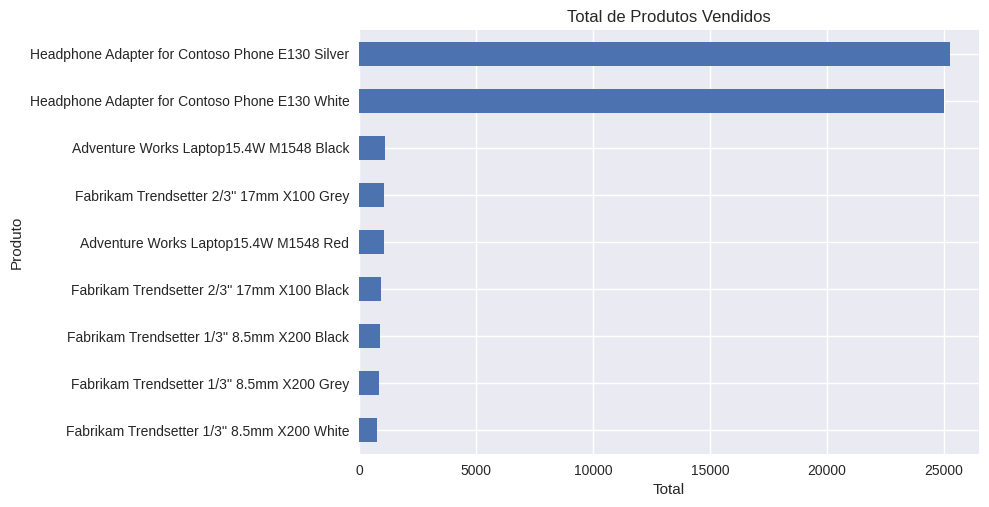

In [71]:
# Gráfico total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel('Total')
plt.ylabel('Produto')

Text(0, 0.5, 'Lucro')

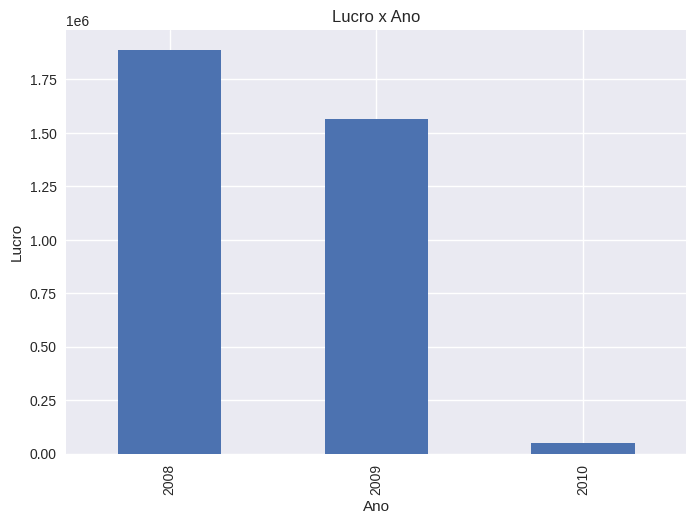

In [72]:
df.groupby(df['Data Envio'].dt.year)['lucro'].sum().plot.bar(title="Lucro x Ano")
plt.xlabel('Ano')
plt.ylabel('Lucro')

In [73]:
df.groupby(df['Data Envio'].dt.year)['lucro'].sum()

Data Envio
2008           1,886,320.16
2009           1,563,190.66
2010              48,312.27
Name: lucro, dtype: float64

In [76]:
#selecionando apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [77]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

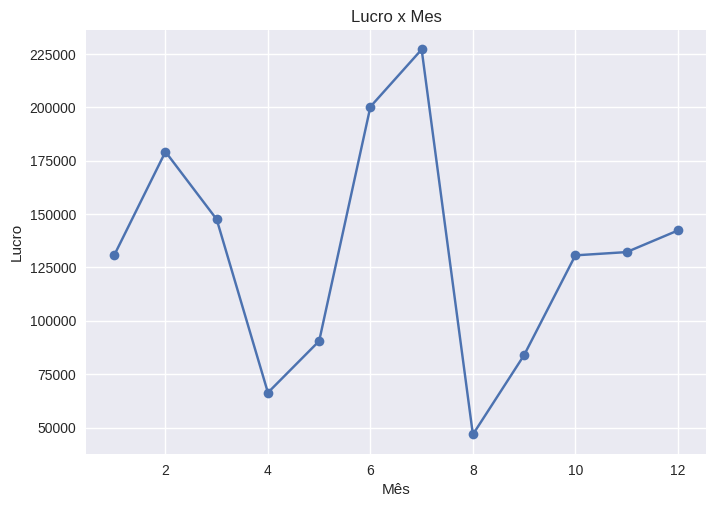

In [80]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title="Lucro x Mes", marker='o')
plt.xlabel('Mês')
plt.ylabel('Lucro')

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

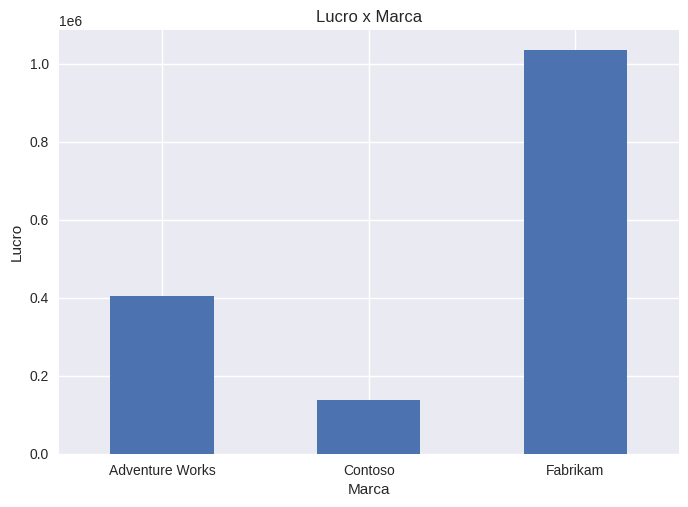

In [85]:
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal') # a lengenda no eixo x fica horizontalmente

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

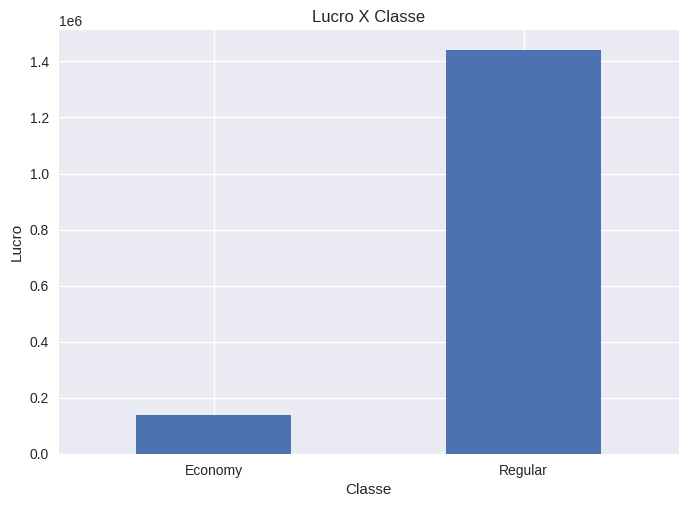

In [83]:
df_2009.groupby('Classe')['lucro'].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal')

In [86]:
df['tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: tempo_envio, dtype: float64

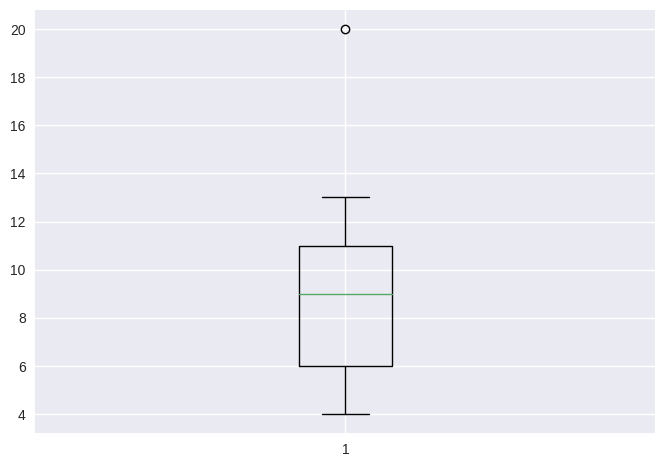

In [89]:
#gráfico de boxplot
plt.boxplot(df['tempo_envio']);

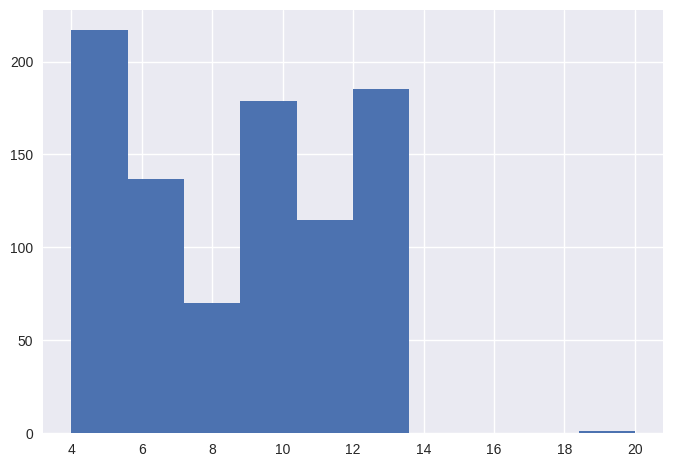

In [91]:
# histograma
plt.hist(df['tempo_envio']);

In [92]:
# periodo mínimo de envio
df['tempo_envio'].min()

4

In [93]:
# tempo máximo de envio
df['tempo_envio'].max()

20

In [94]:
# identificando o outlier
df[df['tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [96]:
df.to_csv('df_vendas_novo.csv', index=False)